## **Problem 1 Denoising**

3. Next, we study this denoising algorithm numerically.

- Towards this goal, generate a random 𝑘-dimensional subspace in $ℜ^{1000}$, and generate 500 random points in that subspace.

- Next, denoise each of those data points with the method above,
and plot the average of the mean-squared error $\frac{||\hat{x} − x^*||_2^2}{||x^*||_2^2}$ along with corresponding
standard deviations as error bar for different values of k = 1, 100, 200, . . . , 1000.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import orth

In [ ]:
def estimator(U, y):
    return np.dot(np.dot(U, U.T), y)

def MSE(x_hat, x_star):
    return np.linalg.norm(x_hat - x_star) ** 2 / np.linalg.norm(x_star) ** 2

In [ ]:
ks = [1]
ks.extend([i * 100 for i in range(1, 11)])
errs = []

for k in ks:
    # 1. Generate k-dim subspace in R^1000
    subspace = np.random.rand(1000, k)

    # 2. Generate 500 points in the subspace, and obtain the observation
    signal = subspace[:, np.random.randint(k, size=500)]
    noise = np.random.randn(1000, 500)
    observe = signal + noise / np.sqrt(1000.0)

    # 3. Calculate MSE
    U = orth(subspace)
    x_hat = estimator(U, observe)
    errs.append(MSE(x_hat, signal))

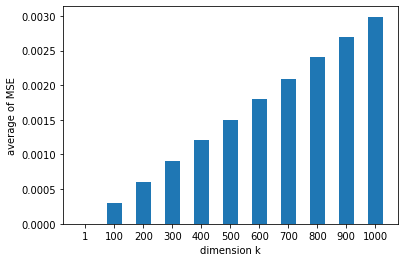

In [ ]:
plt.bar([str(k) for k in ks], errs, width=0.5)
plt.xlabel('dimension k')
plt.ylabel('average of MSE')
plt.show()

**Note**

> Based on Part 1: $\mathbb{E}[||\hat{x} − x^*||_2^2] = σ^2\frac{k}{n}$, where expectation is over the random noise, I might guess that the MSE is positively related to dimension k.

> For a small k, it is a liitle bit confusing how to generate 500 random points in the subspace. (I hope that I realize the question with a right and proper method.)